<a href="https://colab.research.google.com/github/Sahil9424r/product_reviews_seniment_ananlysis/blob/main/ProductSentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import files
# files.upload()  # Upload kaggle.json
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/

# !chmod 600 ~/.kaggle/kaggle.json
# path = "C:\\Users\\sahil\\.kaggle\\kaggle.json"

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d niraliivaghani/flipkart-product-customer-reviews-dataset

Dataset URL: https://www.kaggle.com/datasets/niraliivaghani/flipkart-product-customer-reviews-dataset
License(s): DbCL-1.0
  0% 0.00/3.79M [00:00<?, ?B/s]
100% 3.79M/3.79M [00:00<00:00, 797MB/s]


In [ ]:
!unzip -o  /content/flipkart-product-customer-reviews-dataset.zip

Archive:  /content/flipkart-product-customer-reviews-dataset.zip
  inflating: Dataset-SA.csv          


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [ ]:
print(pd.__version__)
print(np.__version__)
print(sklearn.__version__)

2.2.2
2.0.2
1.6.1


In [ ]:
df=pd.read_csv("/content/Dataset-SA.csv")

In [ ]:
df.head(3)

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive


In [ ]:
df.drop(columns=['product_name'	,'product_price'	,'Rate'],inplace=True)

In [ ]:
df.head()

,Review,Summary,Sentiment
0,super!,great cooler excellent air flow and for this p...,positive
1,awesome,best budget 2 fit cooler nice cooling,positive
2,fair,the quality is good but the power of air is de...,positive
3,useless product,very bad product its a only a fan,negative
4,fair,ok ok product,neutral


In [ ]:
d=df.copy()

In [ ]:
d.head()

,Review,Summary,Sentiment
0,super!,great cooler excellent air flow and for this p...,positive
1,awesome,best budget 2 fit cooler nice cooling,positive
2,fair,the quality is good but the power of air is de...,positive
3,useless product,very bad product its a only a fan,negative
4,fair,ok ok product,neutral


In [ ]:
d['Review']=d['Review']+d['Summary']


In [ ]:
d.drop(columns=['Review'],inplace=True)

In [ ]:
d.head()

,Summary,Sentiment
0,great cooler excellent air flow and for this p...,positive
1,best budget 2 fit cooler nice cooling,positive
2,the quality is good but the power of air is de...,positive
3,very bad product its a only a fan,negative
4,ok ok product,neutral


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Summary    205041 non-null  object
 1   Sentiment  205052 non-null  object
dtypes: object(2)
memory usage: 3.1+ MB


In [ ]:
d.shape

(205052, 2)

AS NULL VALUES ARE VERY LESS SO WE CAN REMOVE THEM

In [ ]:
d.dropna(inplace=True)

In [ ]:
d.isnull().sum()

,0
Summary,0
Sentiment,0


In [ ]:
d.duplicated().sum()

111120

as duplicates are very large

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205041 entries, 0 to 205051
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Summary    205041 non-null  object
 1   Sentiment  205041 non-null  object
dtypes: object(2)
memory usage: 4.7+ MB


In [ ]:
d.Sentiment.value_counts()

,count
Sentiment,
positive,166575
negative,28232
neutral,10234


drop all dupliactes since they are very large and we dont have any other option

In [ ]:
d.drop_duplicates(inplace=True)


In [ ]:
d.shape

(93921, 2)

In [ ]:
d.Sentiment.value_counts()

,count
Sentiment,
positive,69342
negative,18789
neutral,5790


DATASET IS HIGHLY IMBALANCE

In [ ]:
p,n,c=d.Sentiment.value_counts()

In [ ]:
p,n,c

(69342, 18789, 5790)

SO DO OVERSAMPLING

In [ ]:
dp=d[d['Sentiment']=='positive']

In [ ]:
dn=d[d['Sentiment']=='negative']
dnt=d[d['Sentiment']=='neutral']

In [ ]:
dno=dn.sample(p,replace=True)
dnto=dnt.sample(p,replace=True)

In [ ]:
dno.shape,dnto.shape

((69342, 2), (69342, 2))

In [ ]:
newd=pd.concat([dp,dno,dnto])

In [ ]:
newd = newd.sample(frac=1).reset_index(drop=True)

In [ ]:
newd.shape

(208026, 2)

In [ ]:
newd.head()


,Summary,Sentiment
0,bass was not so good,negative
1,superb fantastic im very much happy with this ...,positive
2,product wise it is a best but by packing it is...,neutral
3,dont buy kettle is not working after 4 months ...,negative
4,remote control not working,neutral


In [ ]:
newd.Sentiment.value_counts()

,count
Sentiment,
negative,69342
positive,69342
neutral,69342


In [ ]:
import string
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
def preprocess(text):
    # Lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove extra spaces
    text = re.sub('\s+', ' ', text).strip()

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization


    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
print(nltk.__version__)
print(re.__version__)
# print(string.__version__)

3.9.1
2.2.1


In [ ]:
import inflect
p = inflect.engine()
def convert_numbers(text):
    # Replace each number with its word form
    return re.sub(r'\d+', lambda match: p.number_to_words(match.group()), text)


In [ ]:
newd.Summary=newd.Summary.apply(preprocess)

In [ ]:
newd.Summary=newd.Summary.apply(convert_numbers)

In [ ]:
newd.head()

,Summary,Sentiment
0,bass good,negative
1,superb fantastic im much happy soundbar lookin...,positive
2,product wise best packing bad two dent left si...,neutral
3,dont buy kettle working 4 month bad customer s...,negative
4,remote control working,neutral


In [ ]:
from sklearn.preprocessing import LabelEncoder
l= LabelEncoder()
newd.Sentiment=l.fit_transform(newd.Sentiment)

In [ ]:
newd.head()

In [ ]:
newd.tail(10)

In [ ]:
newd.Sentiment.value_counts()

,count
Sentiment,
0,69342
2,69342
1,69342


In [ ]:
newd.shape

In [ ]:
newd.tail()

,Summary,Sentiment
208021,quality fraud better,0
208022,bad phone,0
208023,single man use double sufficient,1
208024,best pricei got 3860i super happy product 2nd ...,2
208025,dont buy showing 15years boy small suitable 7y...,2


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
cv=CountVectorizer()
tf=TfidfVectorizer()
mu=MultinomialNB()
dt=DecisionTreeClassifier()
r=RandomForestClassifier()
lgr=LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
# # wv = api.load('glove-twitter-25')
# !pip install gensim
import gensim
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
newd.head()

,Summary,Sentiment
0,bass good,0
1,superb fantastic im much happy soundbar lookin...,2
2,product wise best packing bad two dent left si...,1
3,dont buy kettle working 4 month bad customer s...,0
4,remote control working,1


In [ ]:
import numpy as np

def get_vector(sentence):
    words = sentence  # assume already preprocessed
    vectors = [wv[word] for word in words if word in wv]

    if vectors:  # if some words found
        return np.mean(vectors, axis=0)
    else:  # no words found, return a zero vector
        return np.zeros(wv.vector_size)

# Apply to the 'text' column
x = np.array([get_vector(s) for s in newd['Summary']])



In [ ]:
y=newd.Sentiment

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.42, random_state=42)

In [ ]:
x_train.shape,y_test.shape

((120655, 300), (87371,))

In [ ]:
import seaborn as sns
def p(model):
  print(model)
  model.fit(x_train,y_train)
  print(model.score(x_train,y_train))
  print(model.score(x_test,y_test))
  yp=model.predict(x_test)
  print(classification_report(yp,y_test))
  print(confusion_matrix(yp,y_test))
  sns.heatmap(confusion_matrix(yp,y_test),annot=True,fmt='d')



In [ ]:
p(r)

RandomForestClassifier()
0.9679748041937757
0.9256274965377528
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     28358
           1       0.97      0.94      0.95     30481
           2       0.91      0.92      0.91     28532

    accuracy                           0.93     87371
   macro avg       0.93      0.93      0.93     87371
weighted avg       0.93      0.93      0.93     87371

[[26030   478  1850]
 [ 1091 28546   844]
 [ 1941   294 26297]]


DecisionTreeClassifier()
0.9679830922879283
0.8574126426388619
              precision    recall  f1-score   support

           0       0.90      0.80      0.85     32469
           1       0.97      0.87      0.92     32668
           2       0.70      0.91      0.79     22234

    accuracy                           0.86     87371
   macro avg       0.86      0.86      0.85     87371
weighted avg       0.88      0.86      0.86     87371

[[26112   557  5800]
 [ 1278 28500  2890]
 [ 1672   261 20301]]


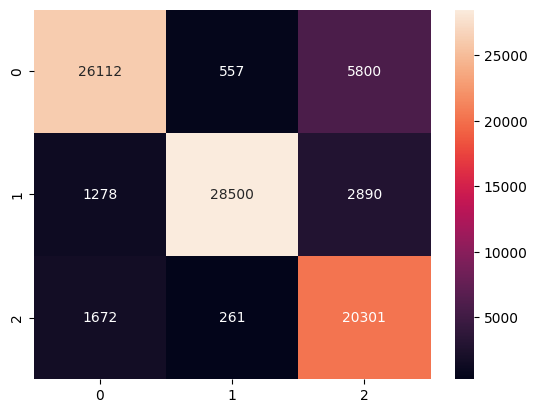

In [ ]:
p(dt)

LogisticRegression(max_iter=1000, multi_class='multinomial')


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


0.4763499233351291
0.47782444976021793
              precision    recall  f1-score   support

           0       0.56      0.51      0.53     32322
           1       0.37      0.45      0.40     24117
           2       0.50      0.47      0.49     30932

    accuracy                           0.48     87371
   macro avg       0.48      0.48      0.47     87371
weighted avg       0.49      0.48      0.48     87371

[[16354  9038  6930]
 [ 5822 10814  7481]
 [ 6886  9466 14580]]


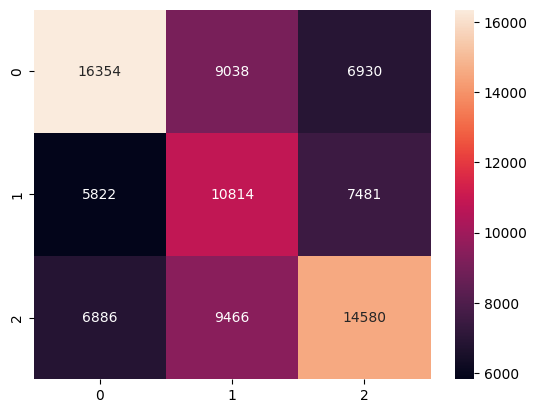

In [ ]:
p(lgr)

RandomForestClassifier()
0.9679830922879283
0.925673278318893
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     28418
           1       0.97      0.94      0.95     30407
           2       0.91      0.92      0.91     28546

    accuracy                           0.93     87371
   macro avg       0.93      0.93      0.93     87371
weighted avg       0.93      0.93      0.93     87371

[[26065   506  1847]
 [ 1055 28510   842]
 [ 1942   302 26302]]


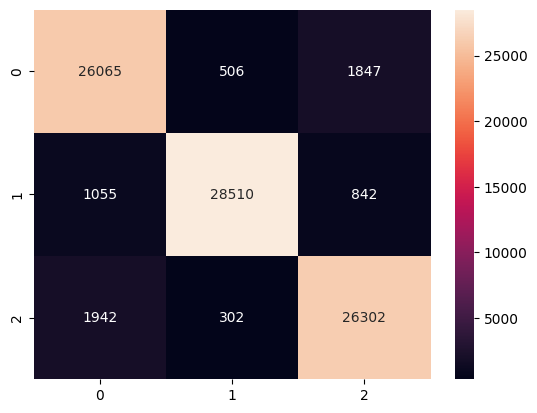

In [ ]:
p(r)

In [ ]:
import joblib

# Save the model
joblib.dump(r, "sentiment_model.pkl")


['sentiment_model.pkl']

In [ ]:
import pickle

# Save the model
with open("sentiment_model.pkl", "wb") as f:
    pickle.dump(r, f)

# Load the model
with open("sentiment_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)


In [ ]:
print(loaded_model)

RandomForestClassifier()


In [ ]:
def check(text):
  preprocess(text)
  x = np.array([get_vector(text)])
  p=loaded_model.predict(x)
  print(p)
  ans=l.inverse_transform(p)
  return ans[0]



In [ ]:
e=newd[newd.Sentiment==1]

In [ ]:
ll=e[:10].Summary.values
ll

array(['product wise best packing bad two dent left side refrigerator mentioned samsung eng installation customer service acknowledgement sheet',
       'remote control working', 'led working', 'podak ok',
       'temperature adjustable guage heating issue becomes hot 3 set cloth pressing',
       'meet expectation', 'excellent product pure made china isi mark',
       'audio input available dslr tried buy somewhere item available',
       'first country origin isnt india description mass chinese product custom brand label strapped nothing wrong product description misleading also price high considering thatusability wise yes foldable tyre size frame size make less practical carry boot car unless pickup van folding good dont space keep homeso considering',
       'product good little costly'], dtype=object)

In [ ]:

check("good product")

array(['positive'], dtype=object)

In [ ]:
check("procduct was amazig,cheap ,good looking and very comfortable.Easy to use")

array(['positive'], dtype=object)

In [ ]:
check("procduct was bad.Worst thing ")

array(['negative'], dtype=object)

In [ ]:
files.download("/content/sentiment_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(l.classes_)  # ['negative', 'neutral', 'positive']


['negative' 'neutral' 'positive']


In [ ]:
s = [

    "Absolutely love it. Highly recommended!",
    "This product exceeded my expectations!",
    "Great quality and fast delivery.",
    "I'm very happy with this purchase.",
    "Excellent performance and beautiful design.",


    "Terrible experience, not worth the money.",
    "The product stopped working after a week.",
    "Very disappointed with the quality.",
    "Customer support was unhelpful.",
    "Complete waste of time and money.",

    "The product is okay, nothing special.",
    "It works as described.",
    "Received it yesterday. Yet to try it.",
    "The delivery was on time.",
    "The packaging was standard."
]
s1=['product wise best packing bad two dent left side refrigerator mentioned samsung eng installation customer service acknowledgement sheet',
       'remote control working', 'led working', 'podak ok',
       'temperature adjustable guage heating issue becomes hot 3 set cloth pressing',
       'meet expectation', 'excellent product pure made china isi mark',
       'audio input available dslr tried buy somewhere item available',
       'first country origin isnt india description mass chinese product custom brand label strapped nothing wrong product description misleading also price high considering thatusability wise yes foldable tyre size frame size make less practical carry boot car unless pickup van folding good dont space keep homeso considering',
       'product good little costly']
for i in s1:
  print(check(i))

[1]
neutral
[1]
neutral
[1]
neutral
[1]
neutral
[1]
neutral
[1]
neutral
[1]
neutral
[1]
neutral
[1]
neutral
[1]
neutral
